# Introduction
The purpose of this exercise is demosntrate how to load an existing model, inspect and alter it. 

We will:
 - load the model constructed in exercise 01, 
 - transfer the workspace to a new directory, 
 - inspect the model packages, 
 - alter the hydraulic conductivity in the upper layer, 
 - re-write the model files and run the model, and
 - plot the outputs

In [1]:
# Import necessary libraries
# for the purposes of this course we are using frozen versions of flopy to avoid dependency failures.  
import os 
import sys
sys.path.append('../dependencies/')
import flopy
import matplotlib.pyplot as plt

In [2]:
# As in the previous exercise, if you do not have MODFLOW 6 in yout system path, you must provide the location of the executable file
# The MODFLOW 6 executable is named "mf6.exe":
exe_name = os.path.join('..','bin', 'mf6.exe')

# define the location of the model working directory;  this is where the existing model is currently stored. We are going to load the model constructed during exercise 01.
org_workspace = os.path.join('..','models','symple_ex01')

# define a new model working directory
workspace = os.path.join('..','models','symple_ex02')

In [3]:
# load the Simulation
sim = flopy.mf6.MFSimulation.load(sim_name='symple_ex02', exe_name=exe_name, sim_ws=org_workspace)

loading simulation...
  loading simulation name file...
  loading tdis package...
  loading model gwf6...
    loading package dis...
    loading package ic...
    loading package npf...
    loading package rch...
    loading package riv...
    loading package oc...
  loading ims package symp01...


In [4]:
# change the model workspace to a new folder
sim.set_sim_path(workspace)

In [5]:
# get a list of model name sin the simulation. Names are used to load the model
model_names = list(sim.model_names)
for mname in model_names:
    print(mname)

symp01


In [6]:
# access the Model Object using the model name
gwf = sim.get_model("symp01")

In [7]:
# check what packages are in the model
pkg_list = gwf.get_package_list()
print(pkg_list)

['DIS', 'IC', 'NPF', 'RCH', 'RIV_0', 'OC']


In [13]:
# access a pacakge 
npf = gwf.get_package('npf')

# inspect the values of k
npf.k

Layer_1{constant 2.5}
Layer_2{constant 0.1}
Layer_3{constant 10.0}

In [9]:
# change k in the upper layer
npf.k.set_data(2.5, layer=0)

# inspect it again
npf.k

Layer_1{constant 2.5}
Layer_2{constant 0.1}
Layer_3{constant 10.0}

In [10]:
# write the files and run the simulation. Inspect the .npf file in the new workspace folder. You should see K in layer 1 has changed.
sim.write_simulation()

sim.run_simulation()

writing simulation...
  writing simulation name file...
  writing simulation tdis package...
  writing ims package symp01...
  writing model symp01...
    writing model name file...
    writing package dis...
    writing package ic...
    writing package npf...
    writing package rch...
    writing package riv_0...
    writing package oc...
FloPy is using the following  executable to run the model: ..\bin\mf6.exe
                                   MODFLOW 6
                U.S. GEOLOGICAL SURVEY MODULAR HYDROLOGIC MODEL
                            VERSION 6.2.1 02/18/2021

   MODFLOW 6 compiled Feb 18 2021 08:24:05 with IFORT compiler (ver. 19.10.2)

This software has been approved for release by the U.S. Geological 
Survey (USGS). Although the software has been subjected to rigorous 
review, the USGS reserves the right to update the software as needed 
pursuant to further analysis and review. No warranty, expressed or 
implied, is made by the USGS or the U.S. Government as to the 
fu

(True, [])

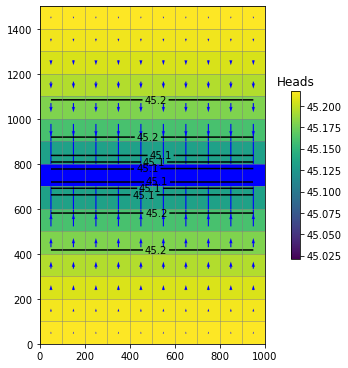

In [12]:
# plot outputs from the upper layer. The code below is the same as used in Exercise 01.

# load outputs
# the head file output can be loaded from the model object:
hds = gwf.output.head()
heads = hds.get_data(idx=0)

# get the specific discharge from the cell budget file
cbb = gwf.output.budget()
spdis = cbb.get_data(text="SPDIS")[0]
qx, qy, qz = flopy.utils.postprocessing.get_specific_discharge(spdis, gwf)


# plot
fig = plt.figure(figsize=(5, 5), constrained_layout=True)
# first instantiate a PlotMapView
mm = flopy.plot.PlotMapView(model=gwf)

# Plot heads
# plot the array of heads 
head_array = mm.plot_array(heads)
# add contour lines with contour_array()
contours = mm.contour_array(heads, colors='black')
# add labels to contour lines
plt.clabel(contours, fmt="%2.1f")
# add a color bar
cb = plt.colorbar(head_array, shrink=0.5, )
cb.ax.set_title('Heads')

# Plot grid 
# you can plot BC cells using the plot_bc() 
mm.plot_bc('RIV', color='blue')
# and plot the model grid if desired
mm.plot_grid(lw=0.5)

# add specific discharge vectors using plot_vector()
quiver = mm.plot_vector(qx, qy, normalize=False, color='blue')